In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
plt.style.use('ggplot')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
daf = r'Reviews.csv'
try:
    df = pd.read_csv(daf)
except pd.errors.ParserError:
  print(".")

.


In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sent = SentimentIntensityAnalyzer()


In [57]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
130079,130080,B002YRBALU,A3Q3EVDIIIRLLL,Shorty,1.0,1.0,4.0,1.340410e+09,great product but too expensive,I ordered this product because I normally buy ...
130080,130081,B002YRBALU,A1865L5YX48NMR,atymer,1.0,1.0,5.0,1.327795e+09,Gourmet Almond Flour,So far this has enhanced my special diet bakin...
130081,130082,B002YRBALU,A2OLMH5EQ1P9KI,Gammy B,1.0,1.0,5.0,1.326758e+09,Very nice almond flour,I ordered this as an experiment into cooking a...
130082,130083,B002YRBALU,A3EEJIEECGZ3Q0,D. LAROUX,1.0,1.0,5.0,1.311034e+09,Great substitute for low carb dieters,I purchased this almond flour as an alternativ...


In [58]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']

    if isinstance(text, str):
        res[myid] = sent.polarity_scores(text)
    else:
        res[myid] = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}


  0%|          | 0/130084 [00:00<?, ?it/s]

In [ ]:
res


{1: {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 16: {'n

In [ ]:
DF =pd.DataFrame(res).T
DF

,compound,neg,neu,pos
1,0.0000,0.000,0.000,0.000
2,-0.5664,0.138,0.862,0.000
3,0.8265,0.091,0.754,0.155
4,0.0000,0.000,1.000,0.000
5,0.9468,0.000,0.552,0.448
...,...,...,...,...
130079,0.7836,0.000,0.908,0.092
130080,0.8885,0.000,0.765,0.235
130081,0.8070,0.000,0.844,0.156
130082,0.9184,0.000,0.754,0.246


In [ ]:
DF = DF.reset_index().rename(columns={'index' : 'Id'})

In [42]:
DF = DF.merge(df, how = 'left')
DF

,Id,compound,neg,neu,pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0000,0.000,0.000,0.000,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0.0000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-0.5664,0.138,0.862,0.000,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,3,0.8265,0.091,0.754,0.155,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
4,4,0.0000,0.000,1.000,0.000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130079,130079,0.7836,0.000,0.908,0.092,B002YRBALU,A3PCSINXFNJRNI,"Heidi ""my dog makes me smile""",1.0,1.0,5.0,1.349395e+09,BEST ALMOND FLOUR!,Our family has been grain-free for a year and ...
130080,130080,0.8885,0.000,0.765,0.235,B002YRBALU,A3Q3EVDIIIRLLL,Shorty,1.0,1.0,4.0,1.340410e+09,great product but too expensive,I ordered this product because I normally buy ...
130081,130081,0.8070,0.000,0.844,0.156,B002YRBALU,A1865L5YX48NMR,atymer,1.0,1.0,5.0,1.327795e+09,Gourmet Almond Flour,So far this has enhanced my special diet bakin...
130082,130082,0.9184,0.000,0.754,0.246,B002YRBALU,A2OLMH5EQ1P9KI,Gammy B,1.0,1.0,5.0,1.326758e+09,Very nice almond flour,I ordered this as an experiment into cooking a...


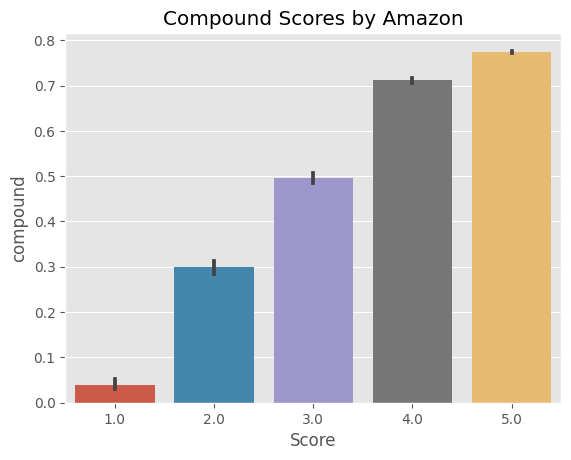

In [60]:
plot1 = sns.barplot(data = DF, x = 'Score', y = 'compound')
plot1.set_title('Compound Scores by Amazon')
plt.show()

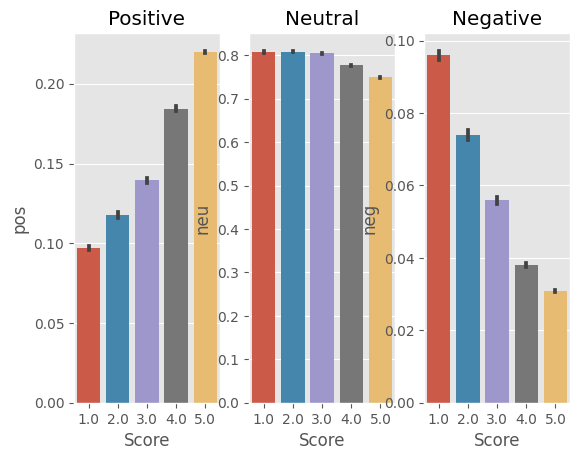

In [64]:
fig , plot2 = plt.subplots(1,3)
sns.barplot(data = DF, x = 'Score', y = 'pos', ax = plot2[0])
sns.barplot(data = DF, x = 'Score', y = 'neu', ax = plot2[1])
sns.barplot(data = DF, x = 'Score', y = 'neg', ax = plot2[2])
plot2[0].set_title('Positive')
plot2[1].set_title('Neutral')
plot2[2].set_title('Negative')
plt.show()